# Apprentissage Non Supervisé
À la différence de l’apprentissage supervisé, l’apprentissage non supervisé est celui où l’algorithme doit opérer à partir d’exemples non annotés. En effet, dans ce cas de figure, l’apprentissage par la machine se fait de manière entièrement indépendante. Des données sont alors renseignées à la machine sans qu’on lui fournisse des exemples de résultats.              

Ainsi, dans cette situation d’apprentissage, les réponses que l’on veut trouver ne sont pas présentes dans les données fournies : l’algorithme utilise des données non étiquetées. On attend donc de la machine qu’elle crée elle-même les réponses grâce à différentes analyses et au classement des données. 

Donc, la machine analyse la structure des données X (sans résultats) pour apprendre ensuite à réaliser elle-même certaines tâches... 

### 1. CLUSTERING
*La classification non supervisée, laisser la machine à classer les données selon leur ressemblence*

### - KMeans Clustering :
- **K-Mean cherche la position des centres qui minimise la distance entre les points d'un cluster(groupe ou classe de points) et le centre de ce dernier :**

*Cela équivaut à minimiser la variance des clusters*

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [52]:
# Nbre d'échantillon dans une population
n_samples = 2000
random_state = 130

# Création du jeu de données
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

In [53]:
# Implémentation d'un KMeans avec 3 centroides (clusters)
model = KMeans(n_clusters=3, random_state=random_state)
# Entrainer le modèle sur les données X
model.fit(X)
# Faire des prédictions
y_pred = model.predict(X)

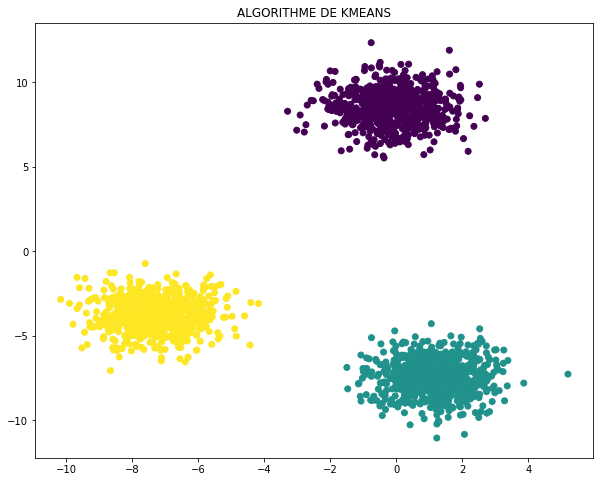

In [55]:
# Visualisation des résultats des 2 premières variables en fonction des prédictions
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
# Afficher la position finale de tous nos centroids
plt.title("ALGORITHME DE KMEANS")
plt.show()

In [57]:
# Fonction coût de notre modèle

# 1ere forme, négative
model.score(X)

# 2nde forme, positive
model.inertia_

3975.786131409415

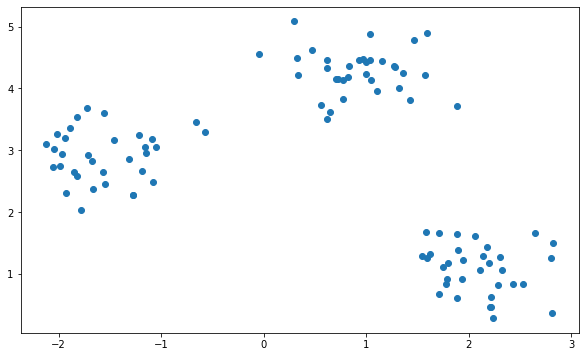

In [74]:
# Reprise de l'exemple précedent avec moins de données
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [75]:
# Créer un modèle avec le nbre de K clusters
model = KMeans(n_clusters=3)
# Entrainer le modèle sur les données X
model.fit(X)

KMeans(n_clusters=3)

In [78]:
# On peut voir comment sont classés les différents échantillons
#model.labels_
# Ou encore appliquer la fonction predic() qui donne le même résultat
y_pred = model.predict(X)

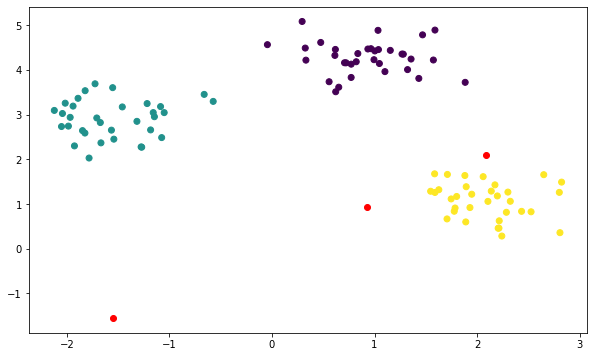

In [79]:
# Visualiser comment sont classées les données
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
# Afficher la position finale de nos centroids
#plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 0], c="r")
plt.show()

### Elbow Method : *Pour trouver le bon nombre de clusters*
   **Détecter une zone de "coude" dans la minimisation du coût (inertia_)**

In [82]:
# Liste des coûts des différents modèles 
inertia = []
# Une rangée de valeurs à tester
K_range = range(1, 30)
for k in K_range:
    # Créer un modèle en l'entrainant sur les données X
    model = KMeans(n_clusters=k).fit(X)
    # Calculer le coût du modèle
    inertia.append(model.inertia_)

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


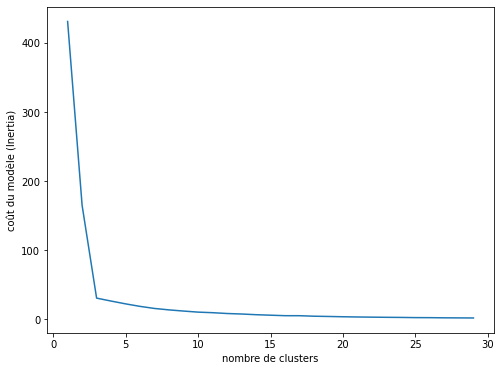

In [85]:
# Graphique pour visualiser
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia)
plt.xlabel("nombre de clusters")
plt.ylabel("coût du modèle (Inertia)")
plt.show()

# 2. Anomaly Detection
   **Cette technique consiste à détecter dans le Dataset les échantillons dont les cartéristiques X sont très éloignées de celles des autres échantillons**

### Isolation Forest : 
- **Cet algo consiste à effectuer une série de split aléatoires dans le Dataset, et compte ensuite le nombre de splits (découpe) qu'il faut effectuer pour pouvoir isoler les échantillons. Plus faible nombre de splits => Forte probabilité d'anomalie**

In [86]:
# Génération de données
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1:] = np.array([2.25, 5])

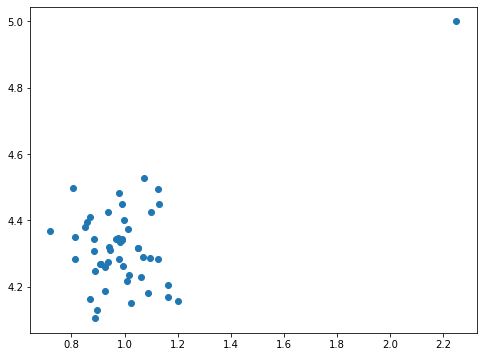

In [87]:
# Visualisation
plt.figure(figsize=(8, 6))
# Les deux premières variables
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [88]:
# Modèle Isolation Forest
from sklearn.ensemble import IsolationForest

In [90]:
# Génération du modèle en précisant le pourcentage de données à filtrer
model = IsolationForest(contamination=0.02)

# Entrainer le modèle sur les données X
model.fit(X)

IsolationForest(contamination=0.02)

In [93]:
model.predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1])

In [96]:
# +1 = Normal
# -1 = Anomalie
# Et d'après le tableau ci-dessus, on peut voir que nous avons une seule anomalie parmi dans l'ensemble

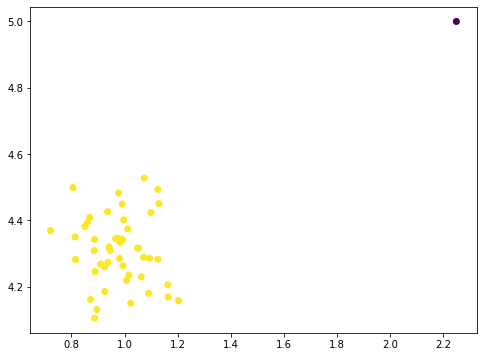

In [95]:
y_pred = model.predict(X)

# Visualisation
plt.figure(figsize=(8, 6))
# Les deux premières variables
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

## Application - Décomposition Digits

In [97]:
from sklearn.datasets import load_digits

In [98]:
# Créer une instance
digits = load_digits()
images = digits.images

# Créer des variables (données)
X = digits.data
# Créer des cibles (classes)
y = digits.target

# Vérification de la dimension des données
X.shape

(1797, 64)

In [99]:
# Créer le modèle, garder le taux de contamination est mieux entre 0.01(1%) et 0.05(5%)
model = IsolationForest(random_state=0, contamination=0.03)

In [102]:
# Entrainer le modèle sur les données X
model.fit(X)

IsolationForest(contamination=0.03, random_state=0)

In [105]:
# L'entrainement et les prédictions peuvent se faire de façon simultanée
model.fit_predict(X)

array([1, 1, 1, ..., 1, 1, 1])

In [106]:
# Les prédictions du modèle tout en filtrant en faisant du booleane Indexing
# Création des outliers contenant toutes les prédictions ayant des valeurs -1 (anomalies)
outliers = model.predict(X) == -1

In [107]:
outliers

array([False, False, False, ..., False, False, False])

In [108]:
# Ejecter ce tableau outliers dans les images
images[outliers]

array([[[ 0.,  6., 13., ...,  8.,  1.,  0.],
        [ 0.,  8., 16., ..., 16.,  6.,  0.],
        [ 0.,  6., 16., ...,  4.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  1.,  8., ...,  3.,  0.,  0.],
        [ 0.,  4., 16., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 15.,  4.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.],
        ...,
        [ 0.,  9., 16., ...,  1.,  0.,  0.],
        [ 0.,  3.,  8., ...,  9.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.]],

       [[ 0.,  6., 16., ..., 15., 10.,  0.],
        [ 0.,  9., 16., ...,  6.,  5.,  0.],
        [ 0., 12., 16., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  3., ...,  0.,  0.,  0.],
        [ 0.,  1.,  5., ...,  0.,  0.,  0.],
        [ 0.,  9., 16., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  2., 12., ...,  0.,  0.,  0.],
        [ 0.,  7., 16., ...,  4.,  1.,  0.],
        [ 0.,  0., 13., ..., 15.,  1.,  0.

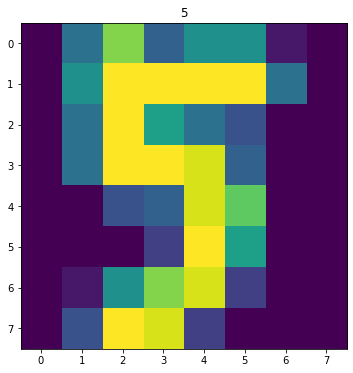

In [113]:
plt.figure(figsize=(8, 6))
# Afficher uniquement les outliers de la 1ère image du Dataset
plt.imshow(images[outliers][0])
# On peut filtrer uniquement le 1er outlier pour savoir ce que répresente ce ciffre
plt.title(y[outliers][0])
plt.show()

### - Local Outlier Factor
   **Cet algo se repose sur la méthode des voisins les plus proches et permet de faire de la** *Novelty Detection (détecte les anomalies dans le données futures*  

# 3. PCA (Analyse en Composantes Princiaples) :
Le principe est de projeter les données sur des axes appelés **Composantes Principales**, en cherchant à minimiser la distance entre les points et leur projections. 
De cette manière, en réduit la dimension du **Dataset** tout en **préservant au maximum la variance** de nos données.

Pour trouver les axes de projection :
- **On calcul la matrice de covariance des données**
- **On détermine les vecteurs propres de cette matrice : ce sont les *Composantes Principales***
- **On projette les données sur ces axes**
## - Dimension Reduction
   **Elle consiste à réduire la complexité superflue d'un Dataset en projetant ses données dans un espace de plus petite dimension (un espace avec moins de variables) en vue d'accélérer l'apprentissage de la machine et de lutter contre le phénomène appelé le** *fléau de la dimension* **(risque d'overfitting lié au surplus de dimensions)**

In [114]:
from sklearn.decomposition import PCA

### Comment choisir le nombre de composantes ?
1. Visualisation des données : 
    *On projette notre Dataset dans un espace* **2D ou 3D (n_components=2 ou 3)**
2. Compréssion de données :
    *Réduire au maximum la taille du Dataset tout en conservant **95-99% de la variance** des données*

In [115]:
# Créer le modèle tout en précisant le nbre de dimension sur lesquelles on souhaite projeter les données (Composantes)
model = PCA(n_components=10)

# Entrainer le modèle sur les données X puis le transformer
model.fit_transform(X)

array([[ -1.25960127,  21.27483616,  -9.46308175, ...,   2.5688571 ,
         -0.58073099,   3.63300194],
       [  7.95744535, -20.76868523,   4.43950936, ...,  -4.57653576,
          3.57969929,  -1.02063413],
       [  6.99213633,  -9.95590616,   2.95864607, ..., -16.44297552,
          0.71275526,   4.23234657],
       ...,
       [ 10.80141633,  -6.96024026,   5.59949426, ...,  -7.44690548,
         -3.95858365, -13.12014578],
       [ -4.87210389,  12.4239306 , -10.17078636, ...,  -4.36040809,
          3.94412296, -13.14724014],
       [ -0.34425499,   6.36557983,  10.7736863 , ...,   0.6422767 ,
         -4.11130058, -12.60619189]])

### 1. Visualisation de données

In [116]:
X.shape

(1797, 64)

In [119]:
# On cherche à projetter ces 64 variables dans un espace 2D  et visualiser cela dans un graphique
model = PCA(n_components=2)
# Entrainer le modèle puis l'utiliser en transformant les données X
X_reduit = model.fit_transform(X)
X_reduit.shape

(1797, 2)

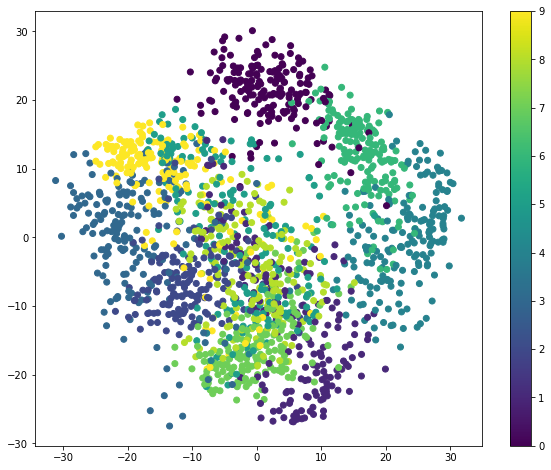

In [122]:
# Observation des deux composantes de X_reduit dans un graphique
plt.figure(figsize=(10, 8))
# Afficher les 2 1ères composantes de X_reduit en fonction des étiquettes(y)
plt.scatter(X_reduit[:, 0], X_reduit[:, 1], c=y)
plt.colorbar()
plt.show()

In [125]:
# A quoi correspondent les axes
correspondance = model.components_

In [126]:
correspondance

array([[ 0.00000000e+00, -1.73094673e-02, -2.23428846e-01,
        -1.35913305e-01, -3.30323065e-02, -9.66340827e-02,
        -8.32943900e-03,  2.26900043e-03, -3.20516517e-04,
        -1.19308911e-01, -2.44451676e-01,  1.48512743e-01,
        -4.67319592e-02, -2.17740747e-01, -1.48136790e-02,
         4.47779463e-03, -4.94136505e-05, -7.95419412e-02,
         8.33951534e-02,  2.15915340e-01, -1.72126795e-01,
        -1.63712103e-01,  2.86444383e-02,  4.23251755e-03,
         9.85488585e-05,  6.42319161e-02,  2.54093312e-01,
        -3.56771056e-02, -2.09462547e-01, -4.31311549e-02,
         5.13118567e-02,  2.13422714e-04,  0.00000000e+00,
         1.59950888e-01,  3.68690761e-01,  1.64406806e-01,
         8.52007959e-02,  3.72982876e-02,  2.15866964e-02,
         0.00000000e+00,  1.28865595e-03,  1.06945297e-01,
         3.03067469e-01,  2.47813036e-01,  2.09637296e-01,
         1.22325217e-02, -3.69458497e-02,  1.61485018e-03,
         6.93023612e-04, -8.35143914e-03, -5.58598892e-0

In [127]:
# On peut voir que chaque correspondance contient 64 valeurs
correspondance.shape

(2, 64)

### 2. Compréssion de données (Réduction de dimension) : *Conserver 95-99%  de la variance de nos données*

In [128]:
X.shape

(1797, 64)

In [129]:
# Entrainer le modèle sur le nbre de variable que l'on a 64
model = PCA(n_components=64)
X_reduit = model.fit_transform(X)

In [130]:
# Examiner le pourcentage de données préservé par chaque composantes
model.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [131]:
# Faire la somme cumulée de toutes ces variances
np.cumsum(model.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

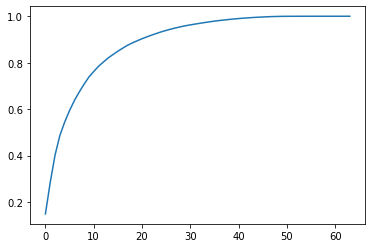

In [137]:
# Visualiser cela dans un graphique
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.show()

In [134]:
# Savoir à partir de quel indice le pourcentage est supérieur à 99%
np.argmax(np.cumsum(model.explained_variance_ratio_) > 0.99 )

40

In [138]:
# Une fois que l'on a su l'indice, on peut alors entrainer à partir de cet indice
model = PCA(n_components=40)
X_reduit = model.fit_transform(X)

In [139]:
# S'il faut visualiser ces images après qu'elles ont été compressées, il va falloir d'abord les
# décompresser afin qu'elles aient à nouveau 64 pixels avec la méthode inverse_transform()
X_recovered = model.inverse_transform(X_reduit)

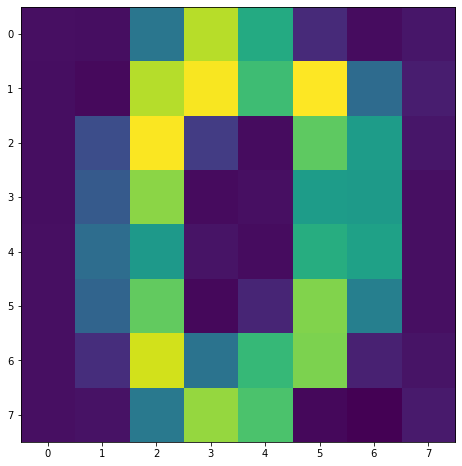

In [141]:
plt.figure(figsize=(10, 8))
plt.imshow(X_recovered[0].reshape((8, 8)))
plt.show()

In [142]:
# Combien de composantes pour atteindre le pourcentage de la variance ?
model.n_components_

40

### NB : 
- **Il faut standardiser les données avant d'utiliser PCA (StandardScaler)**
- **PCA est normalement conçu pour traiter les *variables continues***
- **PCA n'est pas *efficace* sur les Datasets *non-linéaires***